
# Installation

## Loging into the web server

The easiest way to run this and other notebooks for staff and students at Monash University is to log into the Jupyter server at [https://sci-web17-v01.ocio.monash.edu.au/hub](https://sci-web17-v01.ocio.monash.edu.au/hub) The steps for running notebooks are:

* Log in using your monash email address. The first time you log in an empty account will automatically be set up for you.
* Press the start button (if prompted by the system)
* Use the menu of the jupyter system to upload a .ipynb python notebook file or to start a new notebook.


## Installing

Python runs on windows, linux, mac and other environments. 
There are many python distributions available. However the recommended way to install python under Microsoft Windows or Linux is to use the Anaconda distribution available at [https://www.continuum.io/downloads]([https://www.continuum.io/downloads). 
Make sure to get the Python 3.5 version, not 2.7. 
This distribution comes with the SciPy collection of scientific python tools as well as the iron python notebook. 
For developing python code without notebooks consider using spyder (also included with Anaconda)

To open a notebook with anaconda installed, from the terminal run:

```
ipython notebook
```



# Axisymmetric Groundwater Models - Steady State

This Notebook is a playground for students to experiment with the analytical solution for the unconfined groundwater well equation. 

The models are build on the derived well equation for the unconfined aquifer

$$h^2 = h_1^2 + \frac{h_2^2 - h_1^2}{\ln{\frac{r_2}{r_1}}}\ln{\frac{r}{r_1}}$$

The notebook is designed to allow different well parameters to be explored and supports the placment of multiple wells to explore the principle of superpositions.

## Usage

The notebook provides some basic functionality.

Wells can be defined using the following structure.

### Well definition


```
well_1 = {"pos": (dim_x/2 / delta, dim_y/2 / delta), # location of well in (x,y)
                 "q": 0.05, # pumping rate in m/s
                 "r1": 50., # r1 in m
                 "s1": 1.5, # drawdown at r1 in m
                 "pumping": 1} #1 for extraction and -1 for injection
```

### Generating drawdown field

Call assess wells with the well or wells defined above

```
s1 = assess_wells([well_1])

#For multile wells

s_n = assess_wells([well_1,well_2, ..., well_n])

```

To plot call

```
# To plot cross section
plot_cross_section(s1)

# To plot drawdown contours and flow field 
plot_plane_view(s1)

# To plot 3D view of drawdown
plot_3d(s1)

```


In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
# Well equation for unconfined aquifer
def drawdown_unconfined(r, h0, h1, r1, Q, K):
    s = h0 - math.sqrt(h1 * h1 + Q / (math.pi * K) * math.log(r/r1)) 
    #Drawn can get negative when r2 > well influence
    if s < 0.:
        return 0.
    return s

In [4]:
#Size of the modelling domain
delta = 1
dim_x = int(400 / delta) #This must be an integer
dim_y = int(400 / delta)

In [5]:
control_variables = {} # Global variable to count number of figures
control_variables["figure_counter"] = 1

In [6]:
# Iterate over all wells
def assess_wells(wells):
    # Size of the domain
    drawdown = np.zeros((dim_x, dim_y))

    for well in wells:
        for x in range(dim_x):
            for y in range(dim_y):
                # Distance to well
                r = delta * math.sqrt(
                    math.pow(x - well["pos"][0], 2) + 
                    math.pow(y - well["pos"][1], 2)
                )
                if r < 0.25: #Assume well radius is 25 cm
                    r = 0.25
                #Cacluate drawdown at position x, y. Drawdown is caluclated as h0 - h2
                s = drawdown_unconfined(
                    r,
                    h0, 
                    h0 - well["s1"], 
                    well["r1"], 
                    well["q"], 
                    K) * well["pumping"]
                drawdown[x,y] += s
    return drawdown


In [7]:
def plot_cross_section(drawdown):
    # Cross Section
    sy_200 = []
    sx_200 = []
    for x in range(dim_x):
        sx_200.append(x)
        sy_200.append((-drawdown[x,200]))
    fig1=plt.figure(control_variables["figure_counter"])
    control_variables["figure_counter"]+=1
    plt.plot(sx_200,sy_200)

In [8]:
def plot_plane_view(drawdown):
    fig1=plt.figure(control_variables["figure_counter"], figsize=(6,6))
    control_variables["figure_counter"]+=1
    levels = range(-10, 10)
    CS = plt.contour(drawdown, levels = levels)
    CS.levels = ['%.1f'% val for val in CS.levels]
    plt.clabel(CS, CS.levels, inline=True, fontsize=8)

    [dhdx, dhdy] = np.gradient(drawdown)
    idx_x, idx_y = np.meshgrid(np.arange(dim_x) , np.arange(dim_y),  indexing='ij', sparse=False)

    mask = np.logical_or(dhdx != 0,dhdy !=0) ## <-- corrected: one operation less

    #compute positions and lengths of all non-zero vectors
    skip = (slice(None, None, 20), slice(None, None,20))
    X = idx_x
    Y = idx_y
    U = dhdx
    V = dhdy

    plt.quiver( Y[skip], X[skip], V[skip],U[skip], scale = 1)


In [9]:
def plot_3d(drawdown):
    idx_x, idx_y = np.meshgrid(np.arange(dim_x) , np.arange(dim_y),  indexing='ij', sparse=False)
    fig = plt.figure(control_variables["figure_counter"])
    control_variables["figure_counter"]+=1
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(idx_x, idx_y, -drawdown, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

In [10]:
# Aquifer Constants
K = 18.3 / (24. * 60. * 60.)  # m/s
h0 = 25 # m

# Single Well

In [11]:
# Define well x,y, pump rate, r1, s1
well_1 = {"pos": (dim_x/2 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": 1} #1 for extraction and -1 for injection

In [12]:
# Define all wells
s1 = assess_wells([well_1])

## Cross Section

<IPython.core.display.Javascript object>


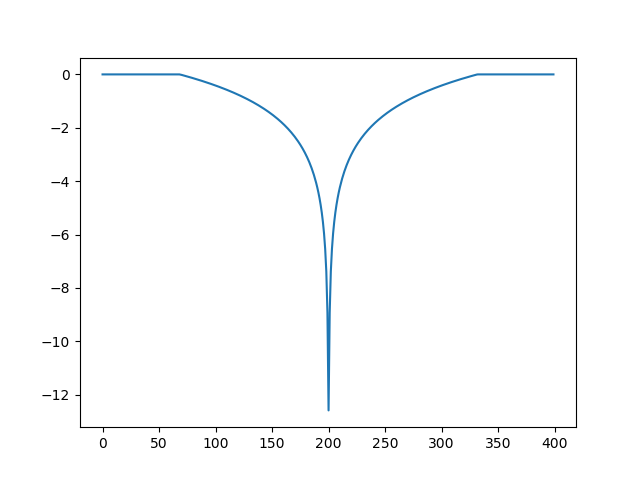

In [13]:
plot_cross_section(s1)

## Plane View

<IPython.core.display.Javascript object>


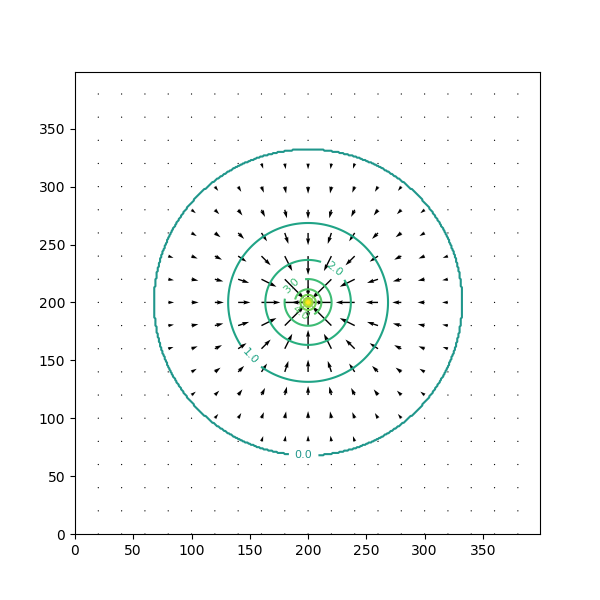

In [14]:
plot_plane_view(s1)

## 3D View

<IPython.core.display.Javascript object>


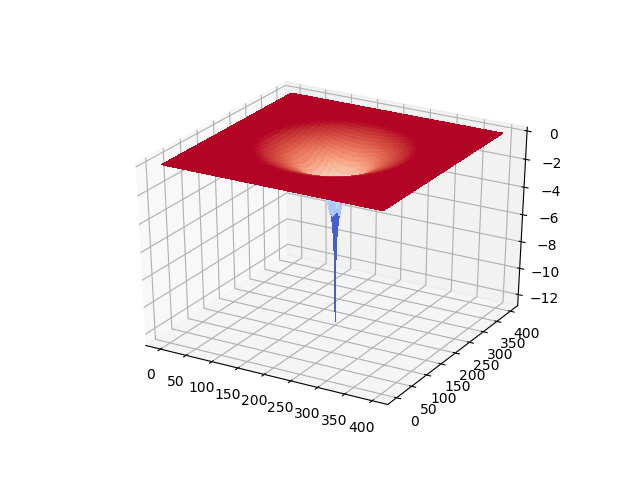

In [15]:
plot_3d(s1)

# Constant head boundary

In [16]:
well_1 = {"pos": (dim_x/3 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": 1} #1 for extraction and -1 for injection
well_2 = {"pos": (dim_x*2/3 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": -1} #1 for extraction and -1 for injection

In [17]:
s2 = assess_wells([well_1, well_2])

<IPython.core.display.Javascript object>


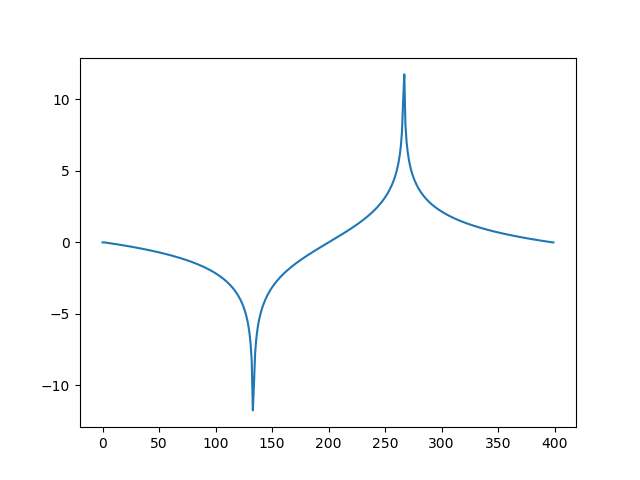

In [18]:
plot_cross_section(s2)

<IPython.core.display.Javascript object>


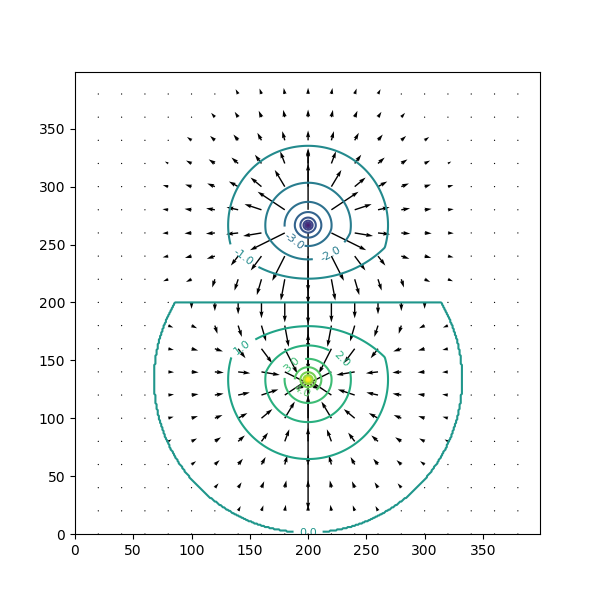

In [19]:
plot_plane_view(s2)

<IPython.core.display.Javascript object>


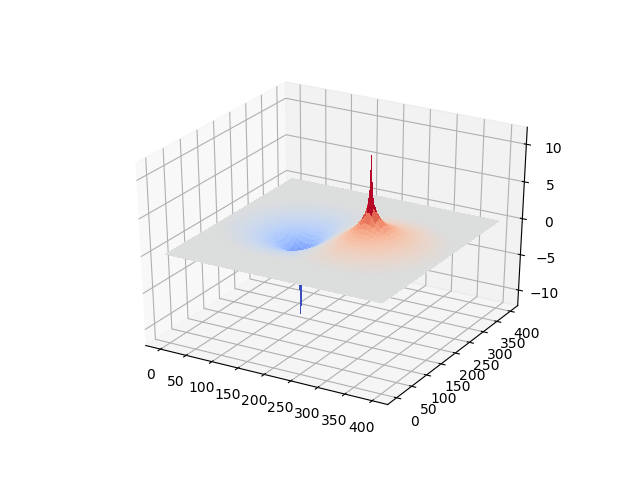

In [20]:
plot_3d(s2)

# No flow boundary

Try to set up the model to simulate the no flow boundary

# Complex Example

Try to work on the Problem 2 of the lecture 3